In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [18]:
data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
data.columns = ['Passengers']

In [8]:
data.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
TRAIN_SIZE = 120
data_train = data.iloc[:TRAIN_SIZE]
data_test = data.iloc[TRAIN_SIZE:data.size]
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.size))

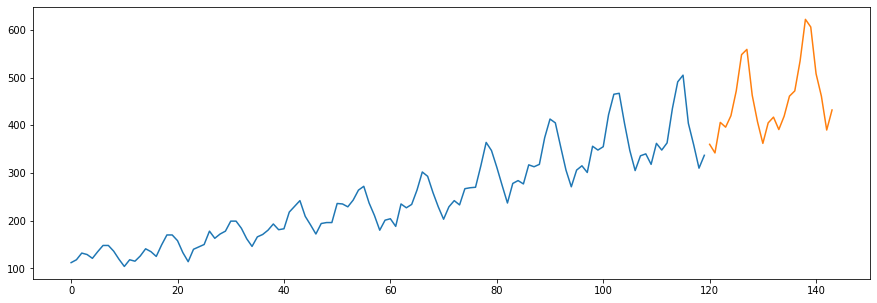

In [109]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test)
plt.show()

In [101]:
# SACAMOS LOS EVALUADORES
"""MAE mean absolute error : MAE = SUM(abs(obs-pred))/N ,  MSE = SUM((obs-pred)^2)/N , RMSE = sqrt(MSE)"""
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
import scipy.stats

In [114]:
# PRUEBO EL RANDOM FOREST

from sklearn import ensemble

model = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
model.fit(np.array(x_train).reshape(-1,1), data_train.values)
y_pred_rf = model.predict(x_test.reshape(-1,1))


/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


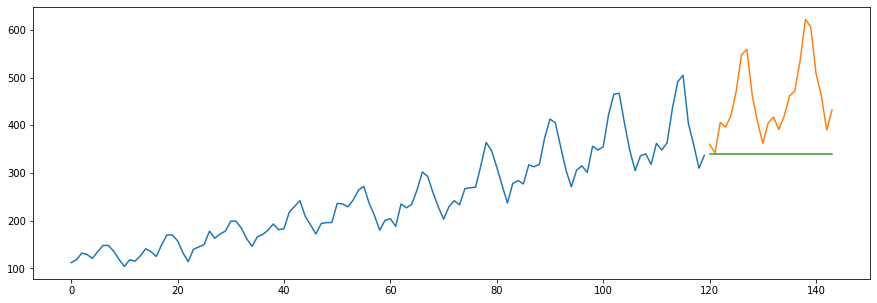

In [103]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test)
ax.plot(x_test, y_pred_rf)
plt.show()

In [262]:
# AÑADIR NUEVA FEATURE:
months = np.tile(list(range(12)), 10)
x_train_month = np.hstack((x_train.reshape(-1,1), months.reshape(-1,1)))
months2 = np.tile(list(range(12)), 2)
x_test_month = np.hstack((x_test.reshape(-1,1), months2.reshape(-1,1)))

In [118]:
model2 = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
model.fit(np.array(x_train_month).reshape(-1,2), data_train.values)
y_pred_rf2 = model.predict(x_test_month.reshape(-1,2))


/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


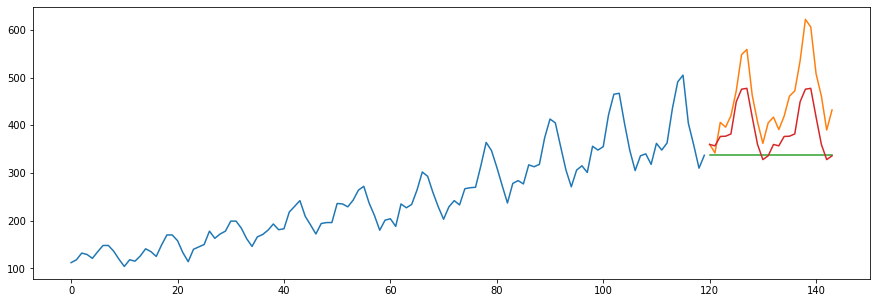

In [119]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_train, data_train)
ax.plot(x_test, data_test)
ax.plot(x_test, y_pred_rf)
ax.plot(x_test, y_pred_rf2)
plt.show()

In [125]:
# Calculamos mae y rmse
print('mae_RF = ', mae(data_test, y_pred_rf))
print('rmse_RF =', np.sqrt(mse(data_test, y_pred_rf)), '\n')

print('mae_RF_month = ', mae(data_test, y_pred_rf2))
print('rmse_RF_month =', np.sqrt(mse(data_test, y_pred_rf2)))

mae_RF =  114.0
rmse_RF = 136.28164770063503 

mae_RF_month =  62.23416666666665
rmse_RF_month = 71.85305954979694


In [126]:
!pip install xgboost
!conda install -y pytorch

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/om/anaconda3/envs/masters

  added / updated specs:
    - pytorch


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pytorch-1.4.0              |cuda100py37h75a84eb_0       301.0 MB
    ------------------------------------------------------------
                                           Total:       301.0 MB

The following packages will be UPDATED:

  pytorch                       1.3.1-cuda100py37h53c1284_0 --> 1.4.0-cuda100py37h75a84eb_0



pytorch-1.4.0        | 301.0 MB  | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [131]:
from xgboost import XGBRegressor, plot_tree, plot_importance
xgb_model = XGBRegressor(n_estimators = 100, max_depth = 3)
xgb_model.fit(x_train.reshape(-1,1), data_train.squeeze())
y_pred_xgb = xgb_model.predict(x_test.reshape(-1,1))

xgb_model2 = XGBRegressor(n_estimators = 100, max_depth = 3)
xgb_model2.fit(x_train_month.reshape(-1,2), data_train.squeeze())
y_pred_xgb2 = xgb_model2.predict(x_test_month.reshape(-1,2))

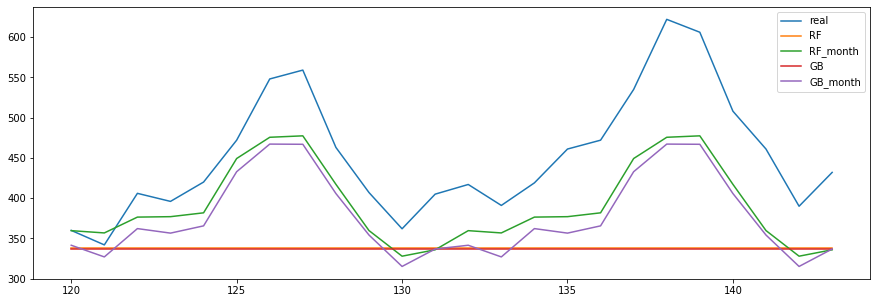

In [134]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label = 'real')
ax.plot(x_test, y_pred_rf, label = 'RF')
ax.plot(x_test, y_pred_rf2, label = 'RF_month')
ax.plot(x_test, y_pred_xgb, label = 'GB')
ax.plot(x_test, y_pred_xgb2, label = 'GB_month')
plt.legend()

In [ ]:
# QUITARLE LA TENDENCIA Y LA HETEROCEDASTICIDAD y aplicar RF y GB? EJERCICIO

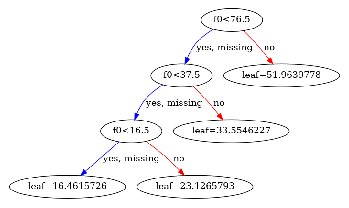

In [137]:
plot_tree(xgb_model, num_trees=2)

In [212]:
model3 = XGBRegressor(n_estimators = 100, max_depth= 3, learning_rate = 1)
model3.fit(x_train_month.reshape(-1,2), data_train.squeeze())
y_pred_xgb3 = model3.predict(x_test_month.reshape(-1,2))

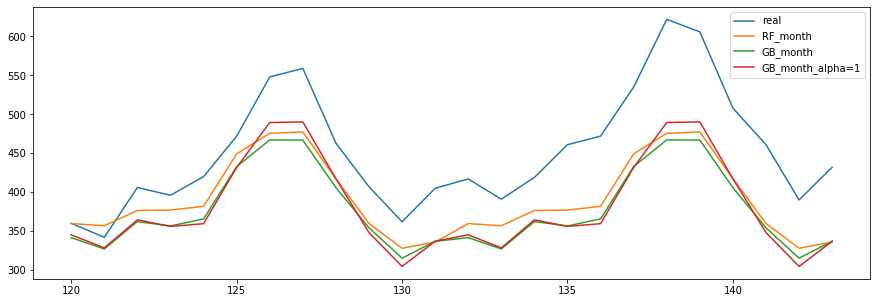

In [213]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label = 'real')
ax.plot(x_test, y_pred_rf2, label = 'RF_month')
ax.plot(x_test, y_pred_xgb2, label = 'GB_month')
ax.plot(x_test, y_pred_xgb3, label = 'GB_month_alpha=1')
plt.legend()

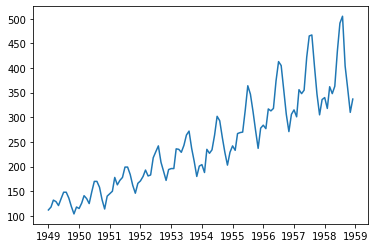

In [197]:
plt.plot(data_train)

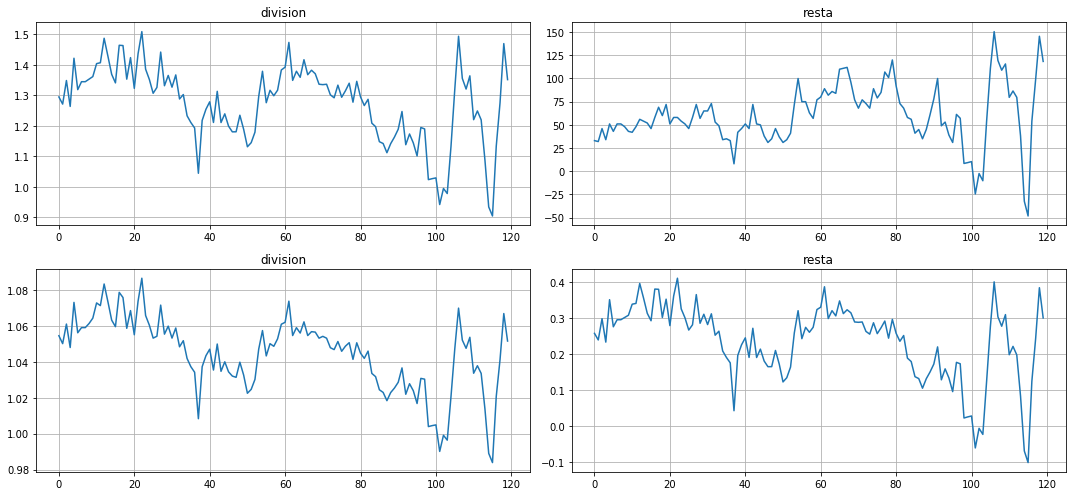

In [361]:
#FEATURE ENGINEERING
#Miro el resultado de restar y dividir la serie con un lag de 2 años en la parte de train
lag2y_div = data_train.values[24:] / data_train.values[:-24]
lag2y_res = data_train.values[24:] - data_train.values[:-24]

lag2y_div2 = np.log(data_train.values[24:]) / np.log(data_train.values[:-24])
lag2y_res2 = np.log(data_train.values[24:]) - np.log(data_train.values[:-24])
fig, ax = plt.subplots(2, 2, figsize=(15,7))
ax[0][0].plot(lag2y_div)
ax[0][0].set_title('division')
ax[0][1].plot(lag2y_res)
ax[0][1].set_title('resta')
ax[0][0].grid()
ax[0][1].grid()

ax[1][0].plot(lag2y_div2)
ax[1][0].set_title('division')
ax[1][1].plot(lag2y_res2)
ax[1][1].set_title('resta')
ax[1][0].grid()
ax[1][1].grid()
plt.tight_layout()

In [205]:
x_train_2ylag = np.hstack(((data_train.values[24:] / data_train.values[:-24])[:-24],
                       (data_train.values[24:] - data_train.values[:-24])[:-24],
                       x_train_month[48:]))

x_test_2ylag = np.hstack(((data_train.values[24:] / data_train.values[:-24])[-24:],
                       (data_train.values[24:] - data_train.values[:-24])[-24:],
                       x_test_month))

In [ ]:
#PROBAR XGBoost con 2ylag, probar XGBoost con maximos, probar XGBoost con la funcion en si lageada y ya está

In [210]:
#PROBAMOS XGBoost con 2ylag
model4 = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 1.5)
model4.fit(x_train_2ylag, data_train.iloc[48:])
y_pred_xgb2y = model4.predict(x_test_2ylag)

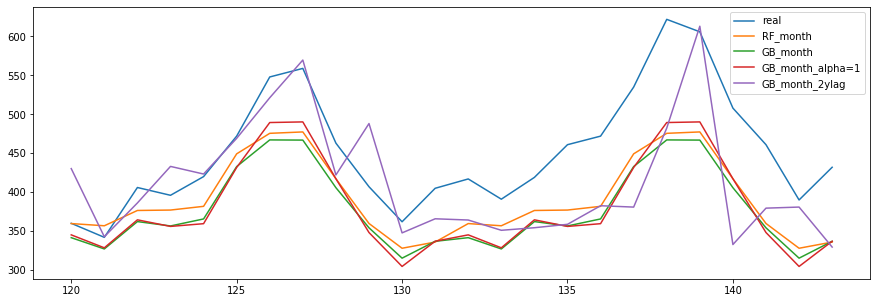

In [214]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label = 'real')
ax.plot(x_test, y_pred_rf2, label = 'RF_month')
ax.plot(x_test, y_pred_xgb2, label = 'GB_month')
ax.plot(x_test, y_pred_xgb3, label = 'GB_month_alpha=1')
ax.plot(x_test, y_pred_xgb2y, label = 'GB_month_2ylag')
plt.legend()

In [525]:
# Calculamos mae y rmse
print('mae_RF = ', mae(data_test, y_pred_rf))
print('rmse_RF =', np.sqrt(mse(data_test, y_pred_rf)), '\n')

print('mae_RF_month = ', mae(data_test, y_pred_rf2))
print('rmse_RF_month =', np.sqrt(mse(data_test, y_pred_rf2)), '\n')

print('mae_XGB_month = ', mae(data_test, y_pred_xgb2))
print('rmse_XGB_month =', np.sqrt(mse(data_test, y_pred_xgb2)), '\n')

print('mae_XGB_month_eta1 = ', mae(data_test, y_pred_xgb3))
print('rmse_XGB_month_eta1 =', np.sqrt(mse(data_test, y_pred_xgb3)), '\n')

print('mae_XGB_month_2ylag_eta1.5 = ', mae(data_test, y_pred_xgb2y))
print('rmse_XGB_month_2ylag_eta1.5 =', np.sqrt(mse(data_test, y_pred_xgb2y)), '\n')

print('mae_XGB_month_2ylag_eta1.5 = ', mae(data_test, y_pred_xgb2y))
print('rmse_XGB_month_2ylag_eta1.5 =', np.sqrt(mse(data_test, y_pred_xgb2y)), '\n')

print('mae_XGB_month_2y_onlydesfased= ', mae(data_test, y_pred_xgb7))
print('rmse_XGB_month_2y_onlydesfased =', np.sqrt(mse(data_test, y_pred_xgb7)), '\n')

mae_RF =  114.0
rmse_RF = 136.28164770063503 

mae_RF_month =  62.23416666666665
rmse_RF_month = 71.85305954979694 

mae_XGB_month =  74.57049560546875
rmse_XGB_month = 82.12814068900484 

mae_XGB_month_eta1 =  71.2341537475586
rmse_XGB_month_eta1 = 77.79410387460308 

mae_XGB_month_2ylag_eta1.5 =  56.89549128214518
rmse_XGB_month_2ylag_eta1.5 = 75.23391039222744 

mae_XGB_month_2ylag_eta1.5 =  56.89549128214518
rmse_XGB_month_2ylag_eta1.5 = 75.23391039222744 

mae_XGB_month_2y_onlydesfased=  54.406115214029946
rmse_XGB_month_2y_onlydesfased = 70.8721681566067 



In [378]:
x_train_lag2y = np.hstack(((data_train.values[24:] - data_train.values[:-24])[:-24],
                          x_train_month[48:]))
x_test_lag2y = np.hstack(((data_train.values[24:] - data_train.values[:-24])[-24:],
                          x_test_month))

model5 = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 2)
model5.fit(x_train_lag2y, data_train[48:])
y_pred_xgb5 = model5.predict(x_test_lag2y)

x_train_lag2y2 = np.hstack(((data_train.values[24:] / data_train.values[:-24])[:-24],
                          x_train_month[48:]))
x_test_lag2y2 = np.hstack(((data_train.values[24:] / data_train.values[:-24])[-24:],
                          x_test_month))

model6 = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 2)
model6.fit(x_train_lag2y2, data_train[48:])
y_pred_xgb6 = model6.predict(x_test_lag2y2)

x_train_lag2y3 = np.hstack((data_train.values[:-24],
                          x_train_month[24:]))
x_test_lag2y3 = np.hstack((data_train.values[-24:],
                          x_test_month))

model7 = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 2)
model7.fit(x_train_lag2y3, data_train[24:])
y_pred_xgb7 = model7.predict(x_test_lag2y3)

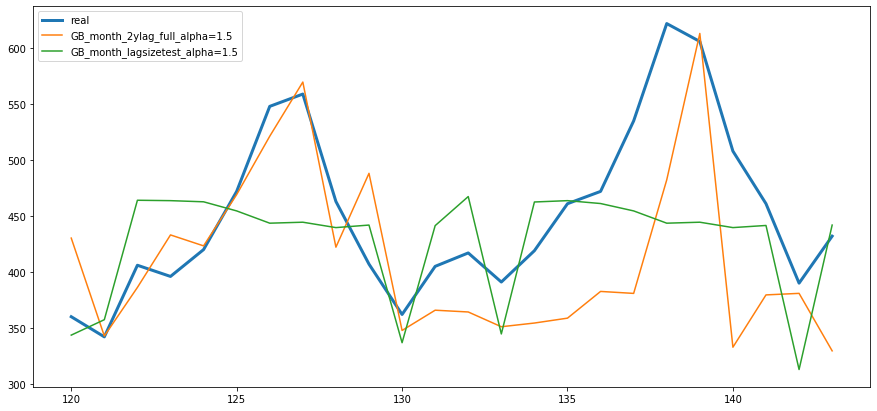

In [526]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x_test, data_test, label = 'real', lw = 3)
#ax.plot(x_test, y_pred_rf2, label = 'RF_month')
#ax.plot(x_test, y_pred_xgb2, label = 'GB_month')
#ax.plot(x_test, y_pred_xgb3, label = 'GB_month_alpha=1')
ax.plot(x_test, y_pred_xgb2y, label = 'GB_month_2ylag_full_alpha=1.5')
ax.plot(x_test, y_pred_xgb7, label = 'GB_month_lagsizetest_alpha=1.5')
#ax.plot(x_test, y_pred_xgb5, label = 'GB_month_2y_resta_alpha=1.5')
#ax.plot(x_test, y_pred_xgb6, label = 'GB_month_2y_divisionalpha=1.5')
plt.legend()

In [537]:
# AÑADIR NUEVA FEATURE:

TRAIN_SIZE = 120
data_train = data.iloc[:TRAIN_SIZE]
data_test = data.iloc[TRAIN:data.size]
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.size))

months = np.tile(list(range(12)), 10)
x_train_month2 = np.hstack((x_train.reshape(-1,1), months.reshape(-1,1)))
months2 = np.tile(list(range(12)), 2)
x_test_month2 = np.hstack((x_test.reshape(-1,1), months2.reshape(-1,1)))

In [506]:
size_test = x_test_month.shape[0]
rmse = []
lag = 3
for lag in range(1,size_test+1):
    y_pred_8 = []
    
    TRAIN_SIZE = 120
    data_train = data.iloc[:TRAIN_SIZE]
    data_test = data.iloc[TRAIN:data.size]
    x_train = np.array(range(TRAIN_SIZE))
    x_test = np.array(range(TRAIN_SIZE, data.size))
    months = np.tile(list(range(12)), 10)
    x_train_month2 = np.hstack((x_train.reshape(-1,1), months.reshape(-1,1)))
    months2 = np.tile(list(range(12)), 2)
    x_test_month2 = np.hstack((x_test.reshape(-1,1), months2.reshape(-1,1)))
    
    
    for i in range(size_test):
    
        x_train_lag1 = np.hstack((data_train.values[:-lag], x_train_month2[lag:]))
        x_test_lag1 = np.hstack((data_train.values.squeeze()[-lag], x_test_month2[0, :]))
    
        model8 = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 1.5)
        model8.fit(x_train_lag1, data_train[lag:])
        y_pred_xgb8 = model7.predict(x_test_lag1.reshape(-1,3))
        y_pred_8.append(y_pred_xgb8[0]) #Vamos añadiendo prediccion a prediccion al train (1 a 1), haciendo más grande el train

    
        x_train_month2 = np.vstack((x_train_month2, x_test_month[0,:]))
        x_test_month2 = x_test_month2[1:,:]
        data_train = pd.DataFrame(np.vstack((data_train.values,  y_pred_xgb8[0].reshape(-1,1))))
        
    rmse_value = mse(data_test.values.squeeze(), y_pred_8)
    rmse.append(rmse_value)

In [507]:
np.sqrt(rmse)

array([ 80.26355971,  77.57186107,  77.27175531,  89.47184266,
        83.7804455 ,  85.072761  ,  98.88701638,  92.80736254,
        96.40800754,  99.73332408,  87.26248325,  75.30629251,
        81.86868491,  78.1897551 ,  76.92965839,  91.28393865,
        95.56043426,  95.84296055,  98.71252308, 103.68746274,
       101.24305708,  93.39492871,  84.48067664,  70.87216816])

In [538]:
size_test = x_test_month.shape[0]
lag = 24
y_pred_8 = []
    
for i in range(size_test):
    
    x_train_lag1 = np.hstack((data_train.values[:-lag], x_train_month2[lag:]))
    x_test_lag1 = np.hstack((data_train.values.squeeze()[-lag], x_test_month2[0, :]))
    
    model8 = XGBRegressor(n_estimators = 100, max_depth = 3, learning_rate = 1.5)
    model8.fit(x_train_lag1, data_train[lag:])
    y_pred_xgb8 = model7.predict(x_test_lag1.reshape(-1,3))
    y_pred_8.append(y_pred_xgb8[0]) #Vamos añadiendo prediccion a prediccion al train (1 a 1)

    
    x_train_month2 = np.vstack((x_train_month2, x_test_month[0,:]))
    x_test_month2 = x_test_month2[1:,:]
    data_train = pd.DataFrame(np.vstack((data_train.values,  y_pred_xgb8[0].reshape(-1,1))))
        
        
rmse_value2 = np.sqrt(mse(data_test.values.squeeze(), y_pred_8))
mae_value2 = mae(data_test.values.squeeze(), y_pred_8)

70.8721681566067 54.406115214029946


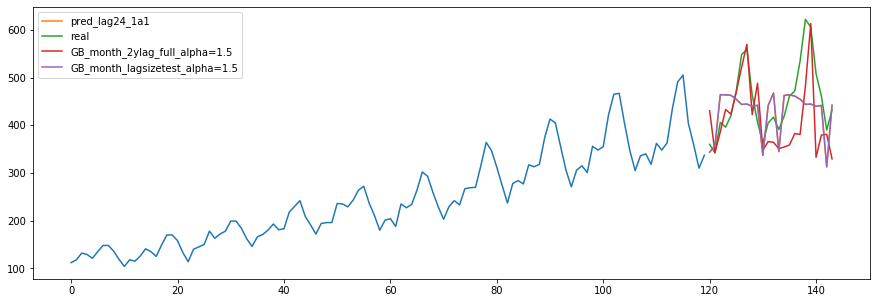

In [531]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_train, data_train.values.squeeze())
ax.plot(x_test, y_pred_8, label='pred_lag24_1a1')
ax.plot(x_test, data_test, label='real')
ax.plot(x_test, y_pred_xgb2y, label = 'GB_month_2ylag_full_alpha=1.5')
ax.plot(x_test, y_pred_xgb7, label = 'GB_month_lagsizetest_alpha=1.5')
plt.legend()
print(rmse_value2, mae_value2)

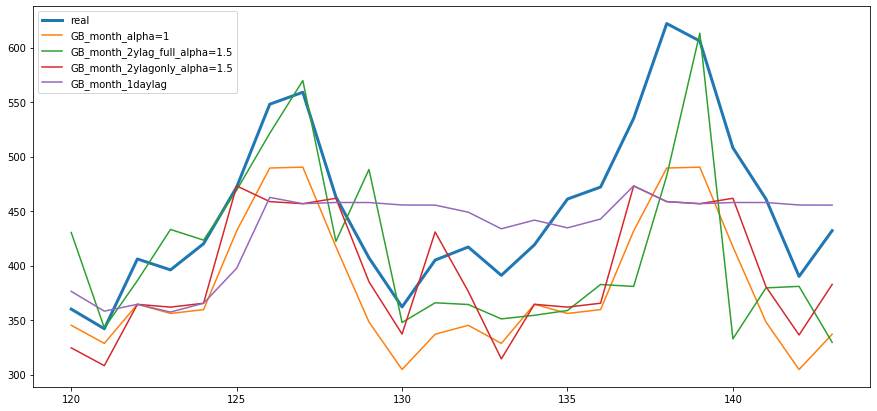

In [359]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(x_test, data_test, label = 'real', lw = 3)
ax.plot(x_test, y_pred_xgb3, label = 'GB_month_alpha=1')
ax.plot(x_test, y_pred_xgb2y, label = 'GB_month_2ylag_full_alpha=1.5')
ax.plot(x_test, y_pred_xgb7, label = 'GB_month_2ylagonly_alpha=1.5')
ax.plot(x_test, y_pred_8, label = 'GB_month_1daylag')

plt.legend()

# FEATURING ENGINEERING APARTADO B

In [541]:
 # Probaré de hacer un RANDOM FOREST y un GRADIENT BOOSTING incluyendo el vector de month y el vector diferencia de data_train

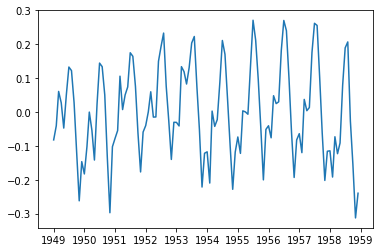

In [20]:
TRAIN_SIZE = 120
data_train = data.iloc[:TRAIN_SIZE]
data_test = data.iloc[TRAIN_SIZE:]
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.values.size))

#Sacamos la heterocedasticidad y la tendencia

data_trainlog = np.log(data_train)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.reshape(-1,1), data_trainlog)
linearpredictions = model.predict(x_train.reshape(-1,1))

data_trainlog_notend = data_trainlog - linearpredictions 

plt.plot(data_trainlog_notend)



In [598]:
#Añado vector de mes (que nos da la estacionalidad) y vector diferencia 2ylag

x_train_month = np.hstack((x_train.reshape(-1,1), np.tile(list(range(12)), 10).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.tile(list(range(12)), 2).reshape(-1,1)))

x_train_m2y = np.hstack(((data_trainlog_notend.values[24:] / data_trainlog_notend.values[:-24])[:-24],
                   (data_trainlog_notend.values[24:] - data_trainlog_notend.values[:-24])[:-24],
                    x_train_month[48:]))
x_test_m2y = np.hstack(((data_trainlog_notend.values[24:] / data_trainlog_notend.values[:-24])[-24:],
                   (data_trainlog_notend.values[24:] - data_trainlog_notend.values[:-24])[-24:],
                    x_test_month))   

In [ ]:
# Ahora ejecuto el Random Forest y el XGBoost

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


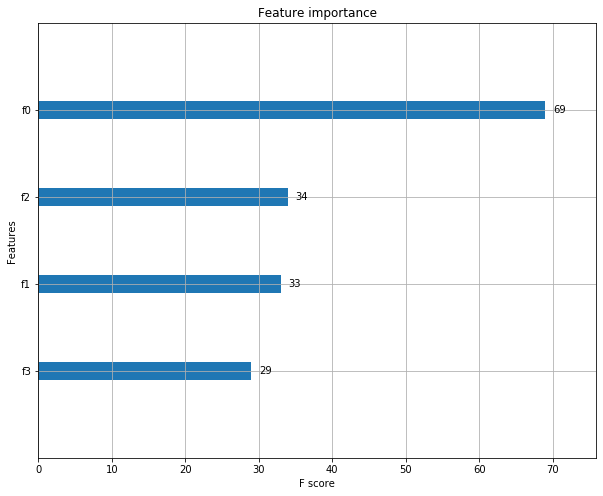

In [690]:
from sklearn import ensemble
model2 = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
model2.fit(x_train_m2y, data_trainlog_notend.iloc[48:])
pred_rf = model2.predict(x_test_m2y)

from xgboost import XGBRegressor, plot_importance, plot_tree

model3 = XGBRegressor(n_estimators = 300, max_depth = 6, learning_rate=1)
model3.fit(x_train_m2y, data_trainlog_notend.iloc[48:])
pred_xgb = model3.predict(x_test_m2y)

ax = plot_importance(model3)
ax.figure.set_size_inches(10,8)

In [619]:
# Montamos las prediciones finales

pred_xgb_final = np.exp(pred_xgb.reshape(-1,1) + model.predict(x_test.reshape(-1,1)))
pred_rf_final = np.exp(pred_rf.reshape(-1,1) + model.predict(x_test.reshape(-1,1)))


mae of xgboost =  34.9977408173769
rmse of xgboost =  44.90127415663523 

mae of RForest =  34.9977408173769
rmse of RForest =  39.99651468975849 

mae of xgboost(no 2y) =  29.270673073443476
rmse of xgboost(no 2y) =  34.200904128998914 

mae of RForest(no 2y) =  29.270673073443476
rmse of RForest(no 2y) =  25.52534419887029 

mae of SARIMA =  21.847140789084296
rmse SARIMA =  26.057385275911173 



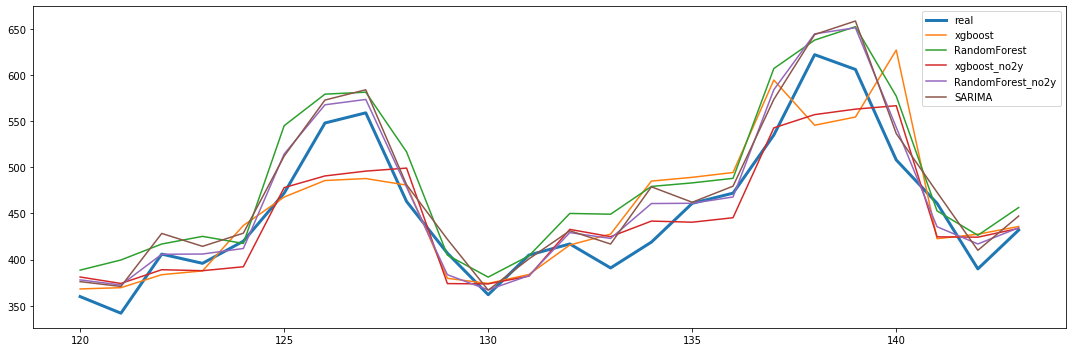

In [667]:
# Hacemos el plot final para compararlos y calculamos nuestras metricas mae y rmse  --- Muy buenos resultados
# Todas ellas se hacen quitandole previamente la heterocedasticidad y la tendencia. También hicimos todos quitandolo del train 
# los primeros dos años.

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label='real', lw = 3)
ax.plot(x_test, pred_xgb_final, label='xgboost')
ax.plot(x_test, pred_rf_final, label='RandomForest')
ax.plot(x_test, pred_xgb_final2, label='xgboost_no2y')
ax.plot(x_test, pred_rf_final2, label='RandomForest_no2y')
ax.plot(x_test, predicted_SARIMA_adj, label='SARIMA')
plt.legend()
plt.tight_layout()

print('mae of xgboost = ',mae(data_test, pred_xgb_final))
print('rmse of xgboost = ', np.sqrt(mse(data_test, pred_xgb_final)), '\n')
                                    
print('mae of RForest = ',mae(data_test, pred_xgb_final))
print('rmse of RForest = ', np.sqrt(mse(data_test, pred_rf_final)), '\n')

print('mae of xgboost(no 2y) = ',mae(data_test, pred_xgb_final2))
print('rmse of xgboost(no 2y) = ', np.sqrt(mse(data_test, pred_xgb_final2)), '\n')
                                    
print('mae of RForest(no 2y) = ',mae(data_test, pred_xgb_final2))
print('rmse of RForest(no 2y) = ', np.sqrt(mse(data_test, pred_rf_final2)), '\n')

print('mae of SARIMA = ',mae(data_test, predicted_SARIMA_adj))
print('rmse SARIMA = ', np.sqrt(mse(data_test, predicted_SARIMA_adj)), '\n')

# Nos damos cuenta que el SARIMA de momento es el que tiene la mejor predicción. Sin embargo, vamos a ajustar con searchgrid
# los Random forest y XGBoost para superar el resultado

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


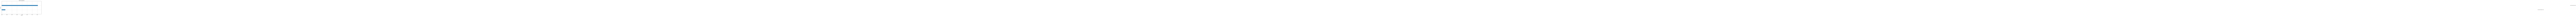

In [676]:
#Probamos sin el vector 2ylag (Engineering featuring en x):

data_trainlog_notend = data_trainlog - linearpredictions 
x_train_month = np.hstack((x_train.reshape(-1,1), np.tile(list(range(12)), 10).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.tile(list(range(12)), 2).reshape(-1,1)))

from sklearn import ensemble
model4 = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 20)
model4.fit(x_train_month[48:].reshape(-1,2), data_trainlog_notend.iloc[48:])
pred_rf_no2y = model4.predict(x_test_month.reshape(-1,2))

from xgboost import XGBRegressor, plot_importance, plot_tree

model5 = XGBRegressor(n_estimators = 300, max_depth = 6, learning_rate=1.1)
model5.fit(x_train_month[48:].reshape(-1,2), data_trainlog_notend.iloc[48:])
pred_xgb_no2y = model5.predict(x_test_month.reshape(-1,2))

pred_xgb_final2 = np.exp(pred_xgb_no2y.reshape(-1,1) + model.predict(x_test.reshape(-1,1)))
pred_rf_final2 = np.exp(pred_rf_no2y.reshape(-1,1) + model.predict(x_test.reshape(-1,1)))


In [665]:
# Probamos con SARIMA, le hemos pasado solo el train con conmponente estacional 

from statsmodels.tsa.statespace.sarimax import SARIMAX

SARModel = SARIMAX(data_trainlog_notend, order = (0, 0, 1), seasonal_order = (1, 1, 0, 12),  
                   enforce_stationarity= False, enforce_invertibility = False)
results = SARModel.fit()
predictions = results.get_forecast(steps = 24)
prediction = predictions.predicted_mean
predicted_SARIMA_adj = np.exp(prediction.values.squeeze() + model.predict(x_test.reshape(-1,1)).squeeze())

/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
/home/om/anaconda3/envs/masters/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


In [691]:
# Vamos a optimizar los parámetros de RF y GB mediante el grid search y luego usaremos Optimización Bayesiana

# GRIDSEARCH

In [822]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import make_scorer
def mse_neg(y_real, y_pred):
    return -mse(np.array(y_real.squeeze()), np.array(y_pred.squeeze()))

my_scorer = make_scorer(mse_neg, greater_is_better = True)


In [804]:
from sklearn.metrics import SCORERS
print(sorted(SCORERS.keys()))

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


In [834]:
from sklearn.model_selection import GridSearchCV

modelrf = RandomForestRegressor()

param1 = [{'n_estimators': [100, 120, 150, 180, 200,  230, 250, 300], 'max_depth' : [12, 14, 16, 18, 20, 23, 25, 27, 30]}]
model_GS = GridSearchCV(modelrf, param_grid = param1, scoring = 'neg_mean_squared_error', cv= 5, return_train_score = True)
model_GS.fit(x_train_month[48:].reshape(-1,2), data_trainlog_notend.iloc[48:].squeeze())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [835]:
model_GS.best_estimator_, model_GS.best_score_

(RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=16, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 -0.004099710979560694)

In [837]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
param2 = [{'n_estimators':[18, 20, 22, 26, 30, 35, 40, 45],           
           'max_depth':[3, 4, 5,6, 7, 8, 9],
          'learning_rate': [1, 1.1, 1.2, 1.25,  1.3, 1.4, 1.5]}]
model_GS_XGB = GridSearchCV(model_xgb, param_grid = param2, scoring = my_scorer, 
                            return_train_score = True, cv = 5, n_jobs=-1)
model_GS_XGB.fit(x_train_month[48:].squeeze(), data_trainlog_notend.iloc[48:].squeeze()) 

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=False, verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid=

In [838]:
model_GS_XGB.best_estimator_, model_GS_XGB.best_score_

(XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=1.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=20, n_jobs=0, num_parallel_tree=1,
              objective='reg:squarederror', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None),
 -0.0035486191492998614)

The rmse of Random Forest optimized is =  4.444309122766244
The mae of Random Forest optimized is =  19.751883578703264 

The rmse of XGBoost optimized is =  4.582848481299067
The mae of XGBoost optimized is =  21.00250020254516


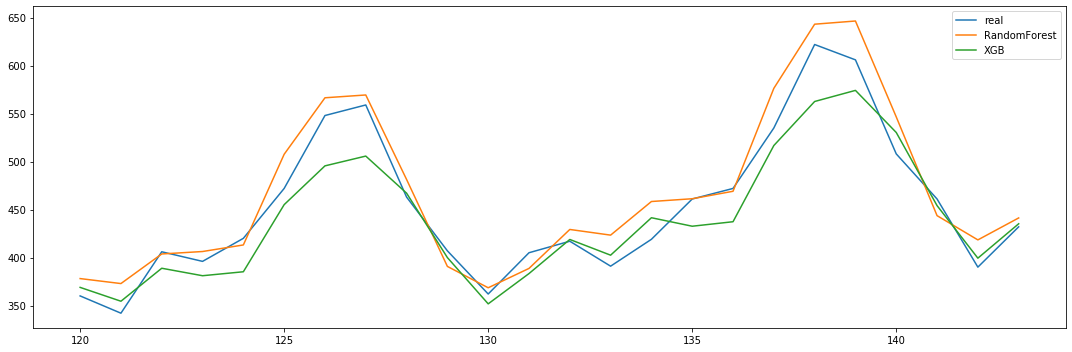

In [840]:
from sklearn.metrics import mean_absolute_error as mse
pred_rf_GS = np.exp(model_GS.best_estimator_.predict(x_test_month) + model.predict(x_test.reshape(-1,1)).squeeze())
pred_rf_XGBoost = np.exp(model_GS_XGB.best_estimator_.predict(x_test_month) + model.predict(x_test.reshape(-1,1)).squeeze())
print('The rmse of Random Forest optimized is = ', np.sqrt(mse(pred_rf_GS, data_test)))
print('The mae of Random Forest optimized is = ', mae(pred_rf_GS, data_test), '\n')

print('The rmse of XGBoost optimized is = ', np.sqrt(mse(pred_rf_XGBoost, data_test)))
print('The mae of XGBoost optimized is = ', mae(pred_rf_XGBoost, data_test))

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label= 'real')
ax.plot(x_test, pred_rf_GS, label= 'RandomForest')
ax.plot(x_test, pred_rf_XGBoost, label= 'XGB')
plt.legend()
plt.tight_layout()

# Los resultados son muy parecidos, superamos en bastante a SARIMA

In [743]:
model_GS.best_score_

0.004462075075988429

In [742]:
model_GS.cv_results_['mean_test_score']

array([0.00443609, 0.00412674, 0.00432296, 0.00420406, 0.00429755,
       0.00416873, 0.0042399 , 0.00421768, 0.00420952, 0.00432851,
       0.0043888 , 0.00423125, 0.00432477, 0.00431181, 0.00426745,
       0.0041992 , 0.00422497, 0.004304  , 0.00433196, 0.0042495 ,
       0.00433433, 0.00413143, 0.00436514, 0.00426958, 0.00428864,
       0.00420699, 0.00424643, 0.00420438, 0.00436573, 0.00424863,
       0.00425991, 0.00426672, 0.00435399, 0.00420962, 0.00436684,
       0.00429022, 0.00436558, 0.00436053, 0.0042516 , 0.00420515,
       0.00434871, 0.00436987, 0.00415622, 0.00435219, 0.0043494 ,
       0.00432802, 0.00435396, 0.00422852, 0.00424915, 0.00440812,
       0.00423325, 0.00423871, 0.0042293 , 0.00421666, 0.00420301,
       0.00421842, 0.00433549, 0.00446208, 0.0041866 , 0.00416674,
       0.00424664, 0.00437768, 0.00431075, 0.00437616, 0.00438764,
       0.00421909, 0.00426004, 0.00420571, 0.00423773, 0.00421043,
       0.00421195, 0.00427426])

In [846]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as ss

In [895]:
param_distrib = [{'n_estimators' : list(range(300)) ,
                 'max_depth' : list(range(3, 15)),
                 'learning_rate' : ss.loguniform(0.01,2)}]

mod = RandomizedSearchCV(model_xgb, param_distributions = param_distrib, n_iter = 5000,
                  scoring = 'neg_mean_squared_error', n_jobs = -1, cv = 5, return_train_score = True)

mod.fit(x_train_month[48:].squeeze(), data_trainlog_notend.iloc[48:].squeeze())

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   param_distributions=[{'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f226b2d7590>,
                                         'max_depth': [3, 4,

In [896]:
print(mod.best_estimator_, '\n',  mod.best_params_)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1.0190640698329696, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=148, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None) 
 {'learning_rate': 1.0190640698329696, 'max_depth': 3, 'n_estimators': 148}


The rmse of XGBoost_RandomSearch is=  4.674994989700158
The mae of XGBoost_RandomSearch is =  21.85557815372158 

The rmse of XGBoost_Grid_Search is =  4.582848481299067
The mae of XGBoost_Grid_Search is =  21.00250020254516


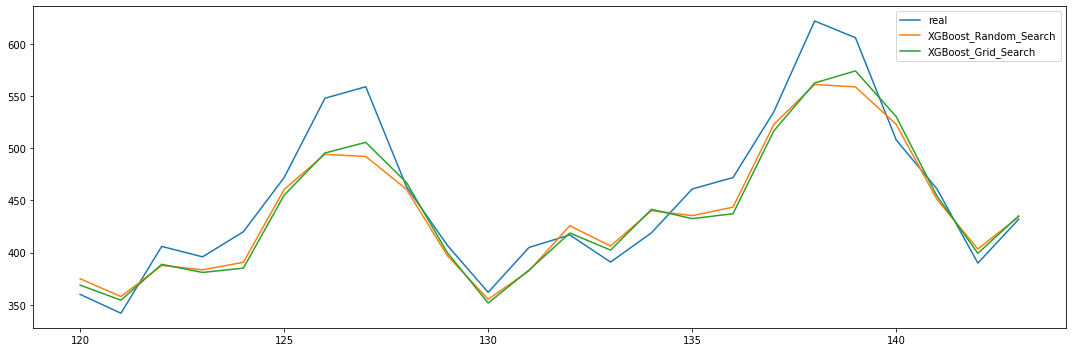

In [905]:
#Comparativa Resultados Random Search Grid Search para XGBoost -- LO MISMO
pred_rf_XGBoost_Random_Search = np.exp(mod.best_estimator_.predict(x_test_month) +
                                       model.predict(x_test.reshape(-1,1)).squeeze())
pred_rf_XGBoost_Grid_Search = np.exp(model_GS_XGB.best_estimator_.predict(x_test_month) +
                                     model.predict(x_test.reshape(-1,1)).squeeze())
print('The rmse of XGBoost_RandomSearch is= ', np.sqrt(mse(pred_rf_XGBoost_Random_Search, data_test)))
print('The mae of XGBoost_RandomSearch is = ', mae(pred_rf_XGBoost_Random_Search, data_test), '\n')

print('The rmse of XGBoost_Grid_Search is = ', np.sqrt(mse(pred_rf_XGBoost_Grid_Search, data_test)))
print('The mae of XGBoost_Grid_Search is = ', mae(pred_rf_XGBoost_Grid_Search, data_test))

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label= 'real')
ax.plot(x_test, pred_rf_XGBoost_Random_Search, label= 'XGBoost_Random_Search')
ax.plot(x_test, pred_rf_XGBoost_Grid_Search, label= 'XGBoost_Grid_Search')
plt.legend()
plt.tight_layout()


In [899]:
#SCIPY.STATS RVS PARA param_distributions

a =  ss.uniform(0, 10)

In [897]:
a.rvs(size = 10)

array([1.98692709, 9.81177456, 5.26985221, 4.79447084, 9.6288321 ,
       3.39234729, 7.28959298, 9.64664308, 5.05441579, 3.83678184])

In [901]:
ss.uniform.rvs(0, 10, size=10)

array([4.98490399, 2.26235894, 9.78436416, 7.4097029 , 2.76053575,
       5.75607385, 1.02818535, 0.10905985, 7.20989414, 3.76400695])

In [882]:
b = ss.norm(1,1)

In [883]:
b.rvs()

-0.6278435534859781

In [7]:
### Tuesday

list(np.random.choice(range(data.shape[1]),1)+1)

[1]

In [19]:
np.random.choice(range(5),5)

array([4, 3, 2, 2, 0])


# Optimización BAYESIANA 

In [175]:
#Obtención datos

data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
data.columns = ['Passengers']
TRAIN_SIZE = 120
data_train = data.iloc[:TRAIN_SIZE]
data_test = data.iloc[TRAIN_SIZE:data.size]
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.size))

x_train_month = np.hstack((x_train.reshape(-1,1), np.tile(list(range(12)), 10).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.tile(list(range(12)), 2).reshape(-1,1)))

data_trainlog = np.log(data_train)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.reshape(-1,1), data_trainlog)
linearpredictions = model.predict(x_train.reshape(-1,1))

data_trainlog_notend = data_trainlog - linearpredictions 

In [4]:
# Using library Skopt


from skopt import BayesSearchCV
from skopt.space import Real, Integer
from xgboost import XGBRegressor
model_xgb = XGBRegressor()


In [68]:
spaces = [{'n_estimators': Integer(1, 1000), 
          'max_depth': Integer(3, 100),
          'learning_rate': Real(0.4, 2)}]

bayes = BayesSearchCV(model_xgb, spaces, n_iter = 200, scoring ='neg_mean_squared_error' ,
              n_jobs = -1, cv=4, verbose = False)

In [69]:
bayes.fit(x_train_month[48:].squeeze(), data_trainlog_notend.iloc[48:].squeeze())

BayesSearchCV(cv=4, error_score='raise',
              estimator=XGBRegressor(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_e...
              optimizer_kwargs=None, pre_dispatch='2*n_jobs', random_state=None,
              refit=True, return_train_score=False,
              scoring='neg_mean_squared_error',
              search_spaces=[{'learning_rate': Real(low=0.4, high=2, prior='uniform', transform='iden

In [30]:
bayes.best_params_

OrderedDict([('learning_rate', 0.5143438259788737),
             ('max_depth', 2),
             ('n_estimators', 996)])

In [60]:
bayes.best_params_

OrderedDict([('learning_rate', 1.0838675634168764),
             ('max_depth', 3),
             ('n_estimators', 484)])

In [61]:
predict_bayes = np.exp(bayes.best_estimator_.predict(x_test_month)
                       + model.predict(x_test.reshape(-1,1)).squeeze())

In [70]:
bayes.best_params_

OrderedDict([('learning_rate', 0.602443051249052),
             ('max_depth', 3),
             ('n_estimators', 15)])

The rmse of XGBoost_Bayes_Search is =  27.494184436846233
The mae of XGBoost_Bayes_Search is =  20.157691734753744


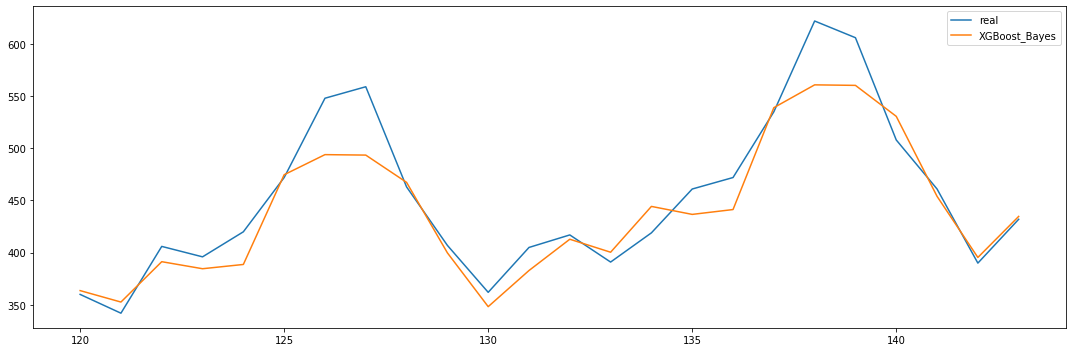

In [71]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
print('The rmse of XGBoost_Bayes_Search is = ', np.sqrt(mse(predict_bayes, data_test)))
print('The mae of XGBoost_Bayes_Search is = ', mae(predict_bayes, data_test))

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(x_test, data_test, label= 'real')
ax.plot(x_test, predict_bayes, label= 'XGBoost_Bayes')
plt.legend()
plt.tight_layout()


In [1]:
#Para instalar GPyOpt and GPy

#sudo apt-get update
#sudo apt-get install python3-dev
#sudo apt-get install build-essential   


#pip install GPy
#pip install GpyOpt 

#No me funcionaba el GPyOpt.methods --solucion
#sudo apt install python3-pip
#pip3 install gpyopt

In [5]:
import GPy
import GPyOpt
import numpy as np
from sklearn import svm
from numpy.random import seed
from GPyOpt.methods import BayesianOptimization

In [242]:
TRAIN_SIZE = 120
data_train = data.iloc[:TRAIN_SIZE]
data_test = data.iloc[TRAIN_SIZE:data.size]
x_train = np.array(range(TRAIN_SIZE))
x_test = np.array(range(TRAIN_SIZE, data.size))

x_train_month = np.hstack((x_train.reshape(-1,1), np.tile(list(range(12)), 10).reshape(-1,1)))
x_test_month = np.hstack((x_test.reshape(-1,1), np.tile(list(range(12)), 2).reshape(-1,1)))

data_trainlog = np.log(data_train)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train.reshape(-1,1), data_trainlog)
linearpredictions = model.predict(x_train.reshape(-1,1))

data_trainlog_notend = data_trainlog - linearpredictions 

In [33]:
#LUNES 18
# In order to apply CV in Temporal Series I will do a method called BlockingTimeSeriesSplit, 
# that respects the cronollogy. 

In [ ]:
# Objective function or WRAP function. Busco diseñar yo esta función para aplicar mi CV para
#Series Temporales. Puedo hacerlo con gp_minimize de la librería skopt o con BayesianOptimizaation 
#de la librería GPyOPT. Opto por la Segunda.

In [215]:
from xgboost import XGBRegressor


domain = [{'name':'n_estimators', 'type':'discrete', 'domain': (30, 100)},
         {'name': 'max_depth', 'type':'discrete', 'domain':(2, 15)},
         {'name': 'learning_rate', 'type':'continuous', 'domain':(0.01, 2)}]

#x_train_month
#data_trainlog_notend

# Para esta librería no especificamos que distribucion de muestreo conviene aplicar.

In [17]:
OPT_TRAIN_SIZE

72

In [243]:
# Objective function or WRAP function. Busco diseñar yo esta función para aplicar mi CV para
#Series Temporales. Puedo hacerlo con gp_minimize de la librería skopt o con BayesianOptimizaation 
#de la librería GPyOPT. Opto por la Segunda.

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
OPT_TRAIN_SIZE = int(TRAIN_SIZE - 48)
N_SAMPLE_SUBSET = int(12)
N_SUBSETS = int(OPT_TRAIN_SIZE / N_SAMPLE_SUBSET)
x_train_month_opt = x_train_month[48:].squeeze()
data_train_opt = data_trainlog_notend.iloc[48:].squeeze()


# x es un vector de 3 componentes (columnas), los hiperparametros
# Puede entrar de diverso tamaño, cada fila es una evaluación de un array de hiperparametros
def objective_function(x):
    x = np.atleast_2d(x)
    fs = np.zeros((x.shape[0], 1))
    
    # Tenemos 120 -48 muestras = 72 muestras. (12 muestras / año -- 6 años)
    for j in range(x.shape[0]):
        fs[j] = 0
    
        # Blocking Time Series Split
        for i in range(0, N_SUBSETS - 1):
            
            
            #Times Series Split
            #for i in range(0, N_SUBSETS - 1):
            idx0 = np.array(range(x_train_month_opt.shape[0]))
            idx_subset_train0 = idx0[0 : (i+1) * (N_SAMPLE_SUBSET)] 
            idx_subset_valid0 = idx0[(i+1)*(N_SAMPLE_SUBSET): (i+2)*(N_SAMPLE_SUBSET)]
            
            # Blocking Time Series Split (3 iteraciones de split
            #for i in range(0, N_SUBSETS - 1, 2):
            #idx1 = np.array(range(x_train_month_opt.shape[0]))
            #idx_subset_train1 = idx1[i * (N_SAMPLE_SUBSET) : (i+1) * (N_SAMPLE_SUBSET)] 
            #idx_subset_valid1 = idx1[(i+1)*(N_SAMPLE_SUBSET): (i+2)*(N_SAMPLE_SUBSET)]
        
            x_train_subset = x_train_month_opt[idx_subset_train0, :]
            data_train_subset = data_train_opt[idx_subset_train0]#Siempre hago referencia a data_train 
            x_validation_subset = x_train_month_opt[idx_subset_valid0, :]  # como variable respuesta
            data_validation_subset = data_train_opt[idx_subset_valid0]
    
            model_xgb = XGBRegressor(n_estimators = int(x[j,0]), max_depth= int(x[j,1]),
                                     learning_rate=x[j,2])
            model_xgb.fit(x_train_subset, np.array(data_train_subset).reshape(-1,1))
            
    
            #LOSS FUNCTION
            rmse_error = np.sqrt(mse(data_validation_subset, model_xgb.predict(x_validation_subset)))
            #fs[j] += rmse_error
            
            R_error = 1- ((rmse_error * N_SAMPLE_SUBSET) /(sum((data_validation_subset -
                                                          np.mean(data_validation_subset))**2 )))
            fs[j] += -R_error
            
            
        fs[j] *= 1/i
        
    return fs #Tenemos que devolver un array 2D columnar, siendo cada fila la evaluación de la
    #loss function de un array de hiperparamentros


In [209]:
mse([1,2], [1,3])

0.5

In [244]:
opt = BayesianOptimization(objective_function,
                     domain = domain,
                     model_type = 'GP', 
                     acquisition_type = 'LCB',
                     X = np.array([148, 3, 1]).reshape(-1,3),
                     num_cores = -1,
                     verbosity = False)

#function to optimize. It should take 2-dimensional numpy arrays as input and return
#2-dimensional outputs (one evaluation per row).

In [ ]:
#Try different regression models
#Try different loss functions   FALTA L1 y L2 (CHECK)
#Try different acquisitions functions (CHECK)
#Try Blocked or no Blocked (CHECK)
#Try RNN models using Keras
#Try increasing or decreasing the blocked splits margins
#Try a different value for k in cross-validation

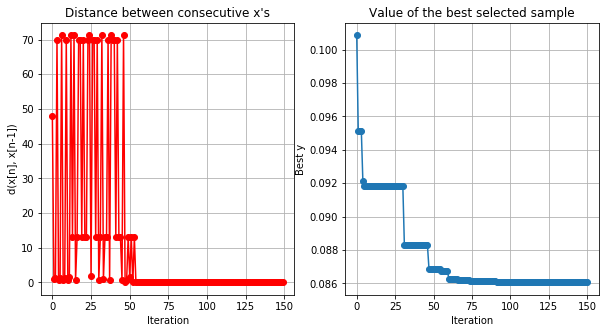

In [192]:
#LCB NO BLOCKING rmse loss function
opt.run_optimization(max_iter=150)
opt.plot_convergence()

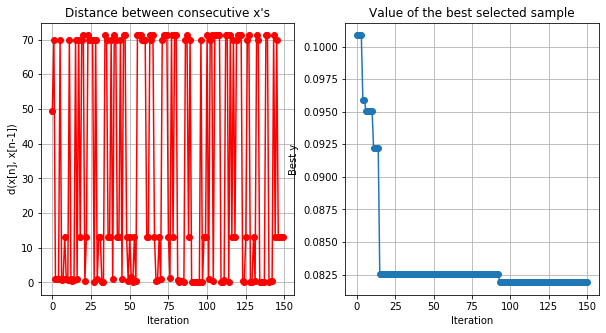

In [202]:
#EI NO BLOCKING  rmse loss function

opt.run_optimization(max_iter=150)
opt.plot_convergence()

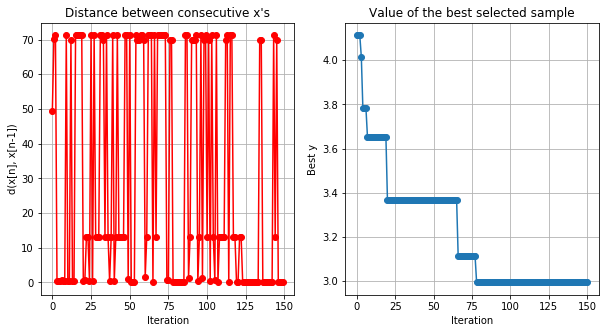

In [238]:
#EI NO BLOCKING  R loss function

opt.run_optimization(max_iter=150)
opt.plot_convergence()


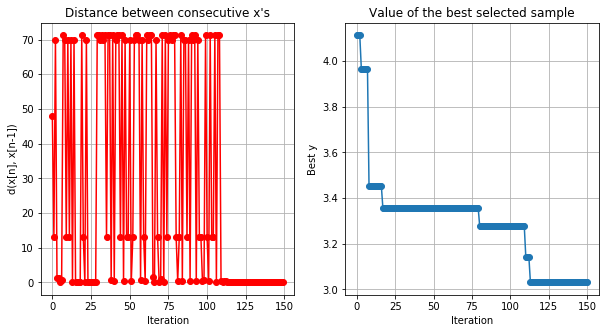

In [245]:
#LCB NO BLOCKING  R loss function

opt.run_optimization(max_iter=150)
opt.plot_convergence()

In [132]:
opt.x_opt

array([30.        , 15.        ,  0.08575423])

In [165]:
opt1 = opt.x_opt
opt1

array([30.       , 15.       ,  0.0853408])

In [171]:
opt2 = opt.x_opt
opt2

array([30.        , 15.        ,  0.09098568])

In [180]:
opt3 = opt.x_opt
opt3

array([30.        , 15.        ,  0.08338007])

In [193]:
#Noblocking
opt4 = opt.x_opt
opt4

array([100.        ,   2.        ,   0.39971806])

In [203]:
#Noblocking
opt5 = opt.x_opt
opt5

array([30.        ,  2.        ,  0.79495771])

In [239]:
#Noblocking R loss function EI
opt6 = opt.x_opt
opt6

array([100.        ,   2.        ,   0.80095985])

In [246]:
#Noblocking R loss function LCB
opt7 = opt.x_opt
opt7

array([30.        ,  2.        ,  0.79939363])

In [205]:
# Fit the model with the optimal tunning parameters will all training part  #rmse loss functon

model_xgb = XGBRegressor(n_estimators =int(opt5[0]), max_depth = int(opt5[1]), 
                         learning_rate = opt5[2])
model_xgb.fit(x_train_month_opt, data_train_opt)
predict_xgb_bayes = model_xgb.predict(x_test_month)
predict_xgb_bayes_train = model_xgb.predict(x_train_month)
pred_BY_Blocked_rmse_GP_EI = np.exp(predict_xgb_bayes + 
                                    model.predict(x_test.reshape(-1,1)).squeeze())
pred_BY_Blocked_rmse_GP_EI_train = np.exp(predict_xgb_bayes_train + 
                                    model.predict(x_train.reshape(-1,1)).squeeze())

The rmse of XGBoost_Bayes_Blocked_rmse_GP_LCB_ is =  16.700725362106127
The mae of XGBoost_Bayes_Blocked_rmse_GP_LCB is =  14.11579804310639 

The rmse of XGBoost_Bayes_Blocked_rmse_GP_EI_ is =  21.654147570608966
The mae of XGBoost_Bayes_Blocked_rmse_GP_EI is =  17.59223915603385


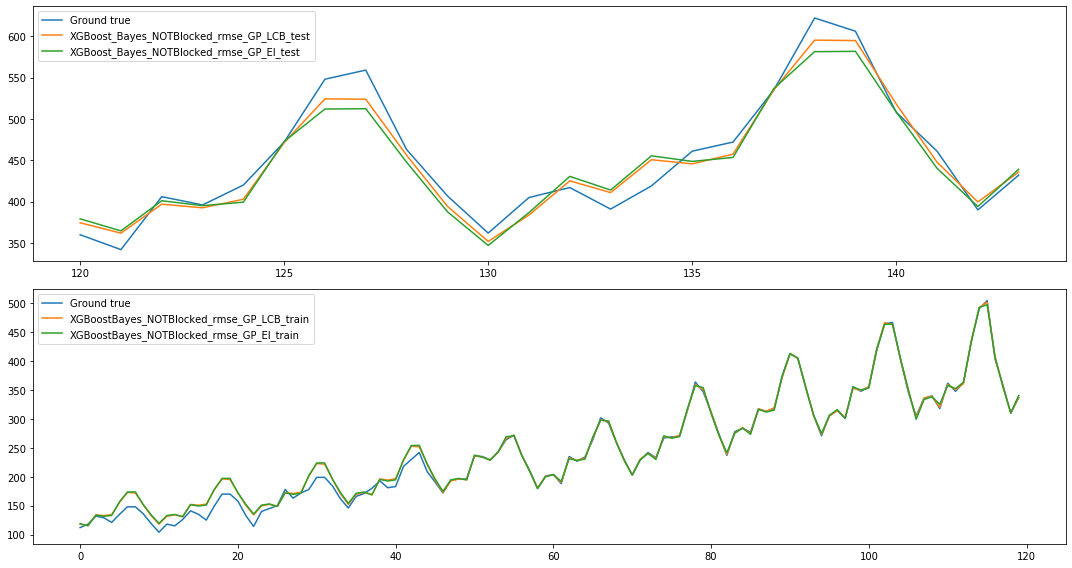

In [207]:
print('The rmse of XGBoost_Bayes_Blocked_rmse_GP_LCB_ is = ', 
      np.sqrt(mse(pred_BY_Blocked_rmse_GP_LCB, data_test)))
print('The mae of XGBoost_Bayes_Blocked_rmse_GP_LCB is = ',
      mae(pred_BY_Blocked_rmse_GP_LCB, data_test), '\n')

print('The rmse of XGBoost_Bayes_Blocked_rmse_GP_EI_ is = ', 
      np.sqrt(mse(pred_BY_Blocked_rmse_GP_EI, data_test)))
print('The mae of XGBoost_Bayes_Blocked_rmse_GP_EI is = ',
      mae(pred_BY_Blocked_rmse_GP_EI, data_test))

fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(x_test, data_test, label= 'Ground true')
ax[0].plot(x_test, pred_BY_Blocked_rmse_GP_LCB, label= 'XGBoost_Bayes_NOTBlocked_rmse_GP_LCB_test')
ax[0].plot(x_test, pred_BY_Blocked_rmse_GP_EI, label= 'XGBoost_Bayes_NOTBlocked_rmse_GP_EI_test')
ax[0].legend()
ax[1].plot(x_train, data_train, label= 'Ground true')
ax[1].plot(x_train, pred_BY_Blocked_rmse_GP_LCB_train, label= 'XGBoostBayes_NOTBlocked_rmse_GP_LCB_train')
ax[1].plot(x_train, pred_BY_Blocked_rmse_GP_EI_train, label= 'XGBoostBayes_NOTBlocked_rmse_GP_EI_train')
ax[1].legend()
plt.tight_layout()


In [247]:
# Fit the model with the optimal tunning parameters will all training part  #R loss functon

model_xgb = XGBRegressor(n_estimators =int(opt7[0]), max_depth = int(opt7[1]), 
                         learning_rate = opt7[2])
model_xgb.fit(x_train_month_opt, data_train_opt)
predict_xgb_bayes = model_xgb.predict(x_test_month)
predict_xgb_bayes_train = model_xgb.predict(x_train_month)
pred_BY_Blocked_R_GP_LCB = np.exp(predict_xgb_bayes + 
                                    model.predict(x_test.reshape(-1,1)).squeeze())
pred_BY_Blocked_R_GP_LCB_train = np.exp(predict_xgb_bayes_train + 
                                    model.predict(x_train.reshape(-1,1)).squeeze())

The rmse of XGBoost_Bayes_Blocked_R_GP_LCB_ is =  19.259872730442147
The mae of XGBoost_Bayes_Blocked_R_GP_LCB is =  15.684296456428209 

The rmse of XGBoost_Bayes_Blocked_R_GP_EI_ is =  19.435618209884105
The mae of XGBoost_Bayes_Blocked_R_GP_EI is =  15.553033531956906


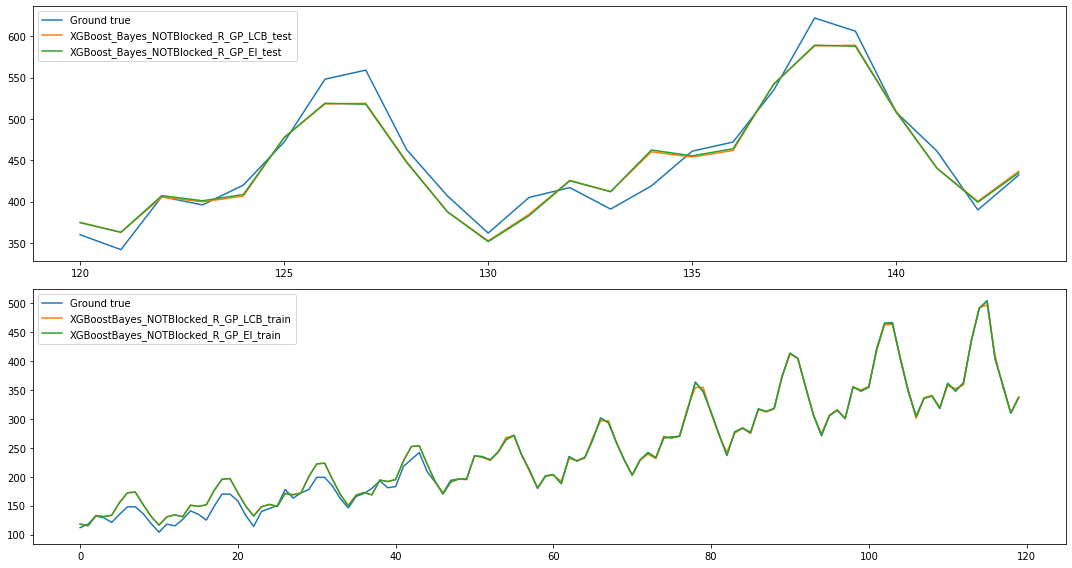

In [248]:
print('The rmse of XGBoost_Bayes_Blocked_R_GP_LCB_ is = ', 
      np.sqrt(mse(pred_BY_Blocked_R_GP_LCB, data_test)))
print('The mae of XGBoost_Bayes_Blocked_R_GP_LCB is = ',
      mae(pred_BY_Blocked_R_GP_LCB, data_test), '\n')

print('The rmse of XGBoost_Bayes_Blocked_R_GP_EI_ is = ', 
      np.sqrt(mse(pred_BY_Blocked_R_GP_EI, data_test)))
print('The mae of XGBoost_Bayes_Blocked_R_GP_EI is = ',
      mae(pred_BY_Blocked_R_GP_EI, data_test))

fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].plot(x_test, data_test, label= 'Ground true')
ax[0].plot(x_test, pred_BY_Blocked_R_GP_LCB, label= 'XGBoost_Bayes_NOTBlocked_R_GP_LCB_test')
ax[0].plot(x_test, pred_BY_Blocked_R_GP_EI, label= 'XGBoost_Bayes_NOTBlocked_R_GP_EI_test')
ax[0].legend()
ax[1].plot(x_train, data_train, label= 'Ground true')
ax[1].plot(x_train, pred_BY_Blocked_R_GP_LCB_train, label= 'XGBoostBayes_NOTBlocked_R_GP_LCB_train')
ax[1].plot(x_train, pred_BY_Blocked_R_GP_EI_train, label= 'XGBoostBayes_NOTBlocked_R_GP_EI_train')
ax[1].legend()
plt.tight_layout()

In [12]:
np.atleast_2d([8,3,3])

array([[8, 3, 3]])

In [ ]:
np.zeros(x.shape[0], 1)